<a href="https://colab.research.google.com/github/Campeone/CNN-Facial-Emotion-Detection/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### READ IN THE IMAGES FILE PATH INTO A DATAFRAME

In [ ]:
import pandas as pd

In [ ]:
import os

def read_images_in_folders(root_folder):
    data = {'Emotion': [], 'Image_list': []}


    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            # Assuming the images are in common formats like JPEG, PNG, etc.
            if filename.lower().endswith(('.png')):
                image_path = os.path.join(foldername, filename)
                emotion_class = os.path.relpath(foldername, root_folder)
                data['Image_list'].append(image_path)
                data['Emotion'].append(emotion_class)

    return pd.DataFrame(data)

#### Training Data

In [ ]:
train_root_folder = '/content/drive/MyDrive/Facial Emotion/train'
train_images_csv = read_images_in_folders(train_root_folder)

In [ ]:
train_images_csv.sample(5)

,Emotion,Image_list
19266,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...
6225,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
11908,happy,/content/drive/MyDrive/Facial Emotion/train/ha...
20028,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...
6638,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...


In [ ]:
train_images_csv['Emotion'].plot.bar()

TypeError: no numeric data to plot

In [ ]:
len(train_images_csv)

20745

There are 20745 images distributed across 6 different classes of facial emotions.

#### Test Data

In [ ]:
test_root_folder = '/content/drive/MyDrive/Facial Emotion/test'
test_images_csv = read_images_in_folders(test_root_folder)

In [ ]:
test_images_csv.sample(5)

,Emotion,Image_list
433,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
14,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
5437,sad,/content/drive/MyDrive/Facial Emotion/test/sad...
2661,happy,/content/drive/MyDrive/Facial Emotion/test/hap...
2074,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...


In [105]:
list(test_images_csv['Emotion'].unique())

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [109]:
class_dict = {'angry':0, 'disgusted':1, 'fearful':2, 'happy':3, 'neutral':4, 'sad':5, 'surprised':6}

In [110]:
test_images_csv['class'] = test_images_csv['Emotion'].map(class_dict)

In [112]:
test_images_csv.sample(8)

,Emotion,Image_list,class
2886,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,3
529,angry,/content/drive/MyDrive/Facial Emotion/test/ang...,0
2264,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,3
1479,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...,2
5203,sad,/content/drive/MyDrive/Facial Emotion/test/sad...,5
1995,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...,2
4913,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,4
5460,sad,/content/drive/MyDrive/Facial Emotion/test/sad...,5


In [113]:
y = test_images_csv['class']

In [114]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7173    6
7174    6
7175    6
7176    6
7177    6
Name: class, Length: 7178, dtype: int64

In [ ]:
len(test_images_csv)

7178

There are 7178 facial images for the test data.

#### VISUALIZE IMAGES RANDOMLY

In [ ]:
# import necessary libraries
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

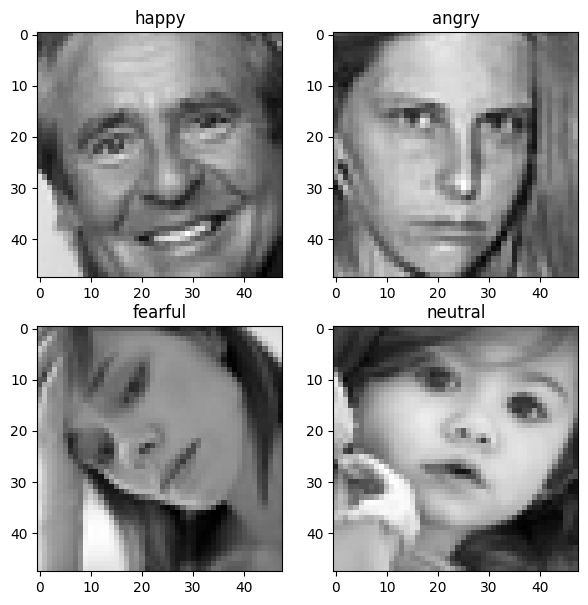

In [ ]:

plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_int = random.choice(range(len(train_images_csv)))
  image = Image.open(train_images_csv['Image_list'][random_int])
  plt.imshow(image, cmap='gray')
  plt.title(train_images_csv['Emotion'][random_int])
  plt.axis(True)

#### CONVERT IMAGES TO TENSORS

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# convert images to tensors
def img_to_arr(img_path):
    test_arr = []
    for image in img_path:
        images = load_img(image, color_mode = 'grayscale')
        input_img = img_to_array(images)
        input_arr = np.array([input_img])
        test_arr.append(input_arr)  # Convert single image to a batch.
    return np.concatenate(test_arr, axis = 0)

In [ ]:
test_list = test_images_csv['Image_list'].to_list()

In [ ]:
test_a = img_to_arr(test_images_csv['Image_list'].to_list())

In [ ]:
test_a.shape

(7178, 48, 48, 1)

### SAVING IMAGE TENSORS TO HDF5 FILE TO SAVING CONVERSION TIME WHEN NEXT I NEED TO WORK ON THE PROJECT.

In [ ]:
# import necessary libraries
import h5py
import numpy as np

# test_a is the NumPy array of image tensors

# Create an HDF5 file
with h5py.File('test_image_tensors.h5', 'w') as hf:
    # Create a dataset in the HDF5 file
    hf.create_dataset('test_image_tensors', data=test_a)

#### CODE TO READ THE SAVED TENSORS BACK IN

In [ ]:


import h5py

# Open the HDF5 file in read mode
with h5py.File('image_tensors.h5', 'r') as hf:
    # Read the dataset
    tensor_images = hf['image_tensors'][:]

#### RESCALE THE IMAGE TENSORS.

In [ ]:
tf.keras.layers.Rescaling(
    test_a, offset=0.0
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [118]:
num_classes = 7

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(48, 48, 1)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation ='softmax')
])

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [120]:
epochs=10
history = model.fit(
  x = test_a, y = y,
  epochs=10
)

Epoch 1/10
225/225 [==============================] - 103s 450ms/step - loss: 1.7931 - accuracy: 0.2573
Epoch 2/10
225/225 [==============================] - 100s 443ms/step - loss: 1.6263 - accuracy: 0.3750
Epoch 3/10
225/225 [==============================] - 95s 423ms/step - loss: 1.4673 - accuracy: 0.4361
Epoch 4/10
225/225 [==============================] - 93s 416ms/step - loss: 1.3422 - accuracy: 0.4919
Epoch 5/10
225/225 [==============================] - 95s 423ms/step - loss: 1.1873 - accuracy: 0.5492
Epoch 6/10
225/225 [==============================] - 93s 414ms/step - loss: 1.0128 - accuracy: 0.6222
Epoch 7/10
225/225 [==============================] - 98s 433ms/step - loss: 0.8236 - accuracy: 0.6978
Epoch 8/10
225/225 [==============================] - 95s 424ms/step - loss: 0.6110 - accuracy: 0.7756
Epoch 9/10
225/225 [==============================] - 94s 418ms/step - loss: 0.3958 - accuracy: 0.8622
Epoch 10/10
225/225 [==============================] - 97s 432ms/step -

In [ ]:
train_arr = img_to_arr(train_images_csv['Image_list'])

KeyboardInterrupt: ignored

In [ ]:
train_arr

In [ ]:
len(test_arr)

1

In [ ]:
train_images_csv['Image_list']

In [ ]:
input_arr

array([[[[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 1.],
         [ 2.],
         [ 1.]],

        [[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 2.],
         [ 2.],
         [ 1.]],

        [[ 4.],
         [ 4.],
         [ 3.],
         ...,
         [ 2.],
         [ 3.],
         [ 2.]],

        ...,

        [[19.],
         [45.],
         [42.],
         ...,
         [31.],
         [32.],
         [37.]],

        [[ 4.],
         [38.],
         [44.],
         ...,
         [33.],
         [37.],
         [30.]],

        [[ 0.],
         [24.],
         [44.],
         ...,
         [31.],
         [17.],
         [14.]]]], dtype=float32)